----

# 로지스틱 회귀분석 사례

## 1. Nodal Dataset

1980년 브라운이 작성한 보고서 데이터셋으로 53명의 전립선암 환자에 대해 조사한 전립선 결절 관련 정보를 담고 있다.

1. m : 하나의 컬럼
1. r : 전립선암 양성 여부
1. aged : 환자의 나이, 60보다 작은면 0, 크면 1
1. stage : 직장을 통해 관찰된 종양의 측정 크기와 위치. 1이면 심각한 정도
1. grade : 수술전 바늘로 추출한 생채조직의 병리학적 판독으로 결정된 암의 심각성 지표. 1이면 심각한 정도
1. xray : X레이 촬영으로 관찰한 암의 측정. 1이면 심각한 정도
1. acid : 혈청안의 산성 포스파타아제 수치

data info : https://www.rdocumentation.org/packages/DPpackage/versions/1.1-7.4/topics/nodal

In [1]:
# 라이브러리 호출
library(boot)

In [3]:
?nodal

In [2]:
# 데이터 확인
head(nodal)
str(nodal)

m,r,aged,stage,grade,xray,acid
1,1,0,1,1,1,1
1,1,0,1,1,1,1
1,1,0,1,1,1,1
1,1,0,1,1,1,1
1,1,0,1,1,1,1
1,0,0,1,1,1,1


'data.frame':	53 obs. of  7 variables:
 $ m    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ r    : num  1 1 1 1 1 0 1 0 0 0 ...
 $ aged : num  0 0 0 0 0 0 0 0 0 0 ...
 $ stage: num  1 1 1 1 1 1 0 0 0 0 ...
 $ grade: num  1 1 1 1 1 1 0 0 0 0 ...
 $ xray : num  1 1 1 1 1 1 0 0 0 0 ...
 $ acid : num  1 1 1 1 1 1 1 1 1 1 ...


## 2. Rogistic Regression Analysis

[r 양성여부]를 종속변수로, [stage 진행단계], [grade 등급], [acid 산성 수치] 3개의 변수를 독립변수로 설정하여 로지스틱 회귀 분석을 실시한다.

In [21]:
a <- c(2, 4, 6, 7)
data <- nodal[a]
head(data)

r,stage,xray,acid
1,1,1,1
1,1,1,1
1,1,1,1
1,1,1,1
1,1,1,1
0,1,1,1


In [17]:
glmModel <- glm(r~., data=data, family = "binomial")

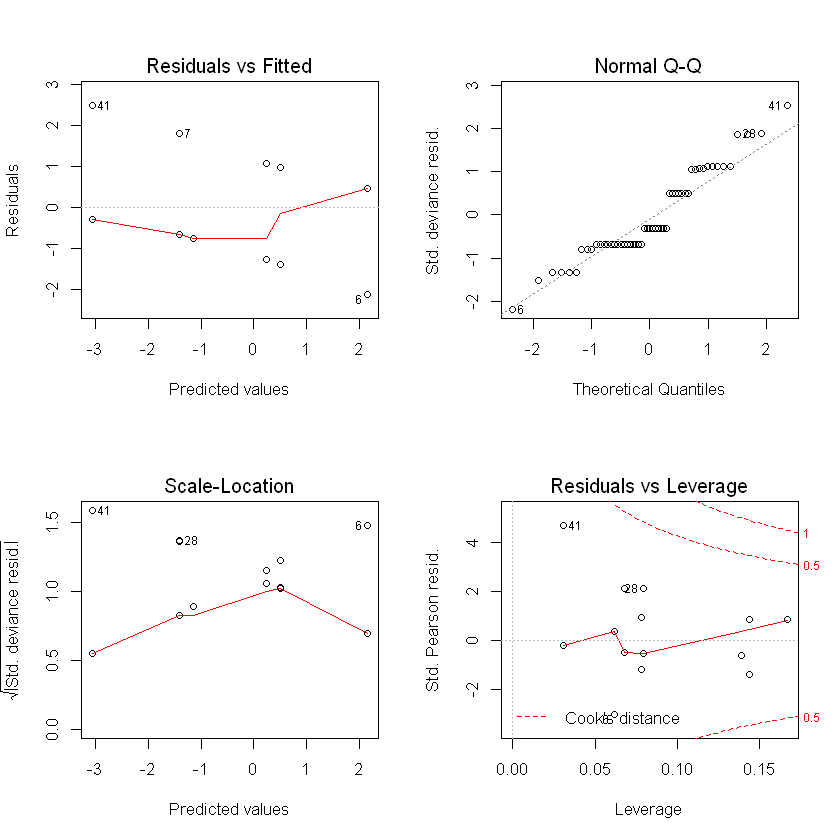

In [19]:
par(mfrow=c(2,2))
plot(glmModel)

## 3. Result

In [20]:
summary(glmModel)


Call:
glm(formula = r ~ ., family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1231  -0.6620  -0.3039   0.4710   2.4892  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.0518     0.8420  -3.624  0.00029 ***
stage         1.6453     0.7297   2.255  0.02414 *  
xray          1.9116     0.7771   2.460  0.01390 *  
acid          1.6378     0.7539   2.172  0.02983 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70.252  on 52  degrees of freedom
Residual deviance: 49.180  on 49  degrees of freedom
AIC: 57.18

Number of Fisher Scoring iterations: 5


1. aged와 grade는 유의수준 5%하에서 유의하지 않아 제외
1. stage, xray, acid는 유의수준 5% 이하에서 유의함.
1. 그러므로 아래 회귀식으로 추정이 가능
1. $$ r = -3.05 + 1.65\times{stage} + 1.19\times{xray} + 1.63{acid} $$


----